# **Exploratory Data Analysis**

## **Loading Data and Packages**


**Import Packages**

In [ ]:
# Import the Data Science Essentials
import pandas as pd
import numpy as np
import matplotlib
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.image as im
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
from IPython import display
from kmodes.kprototypes import KPrototypes

from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm import tqdm

from sklearn.linear_model import Lasso

plt.style.use('dark_background')

: 

**Set Directory**

In [3]:
# Find and set the working directory for this project
os.chdir(r'C:\Users\jdrel\OneDrive\Documents\Data_Science\Springboard\Capstone-2')

There are two datasets that I'm going to be exploring. The first has 12 features that were selected from a lasso regularization whose target variable was a binary choice between intrusion and no intrusion. The second dataset has 79 features which encompass all of the possible lasso regularizations between the different intrusion types giving it a better ability to distinguish between attack types. Given the length of the second data set, I will start with the first dataset so that I have time to run the algorithms and then determine the best way to analyze the second dataset.

**Load the Data**

In [4]:
# Import the smaller dataset
small_df = pd.read_csv('./data/interim/Small_df.csv')
# Drop the weird index and labels
small_df = small_df.drop('Unnamed: 0', axis = 1)
# Drop the weird index and labels
X = small_df.drop('labels', axis = 1)


# Import the bigger dataset
big_df = pd.read_csv('./data/interim/Big_df.csv')
# Drop the weird index
big_df = big_df.drop('Unnamed: 0', axis = 1)

These next datasets were made in this notebook but it is easiest to import it here as it takes over 15 minutes to reproduce them by running the code in this notebook.

In [5]:
# Import the 12 features, clusters and no labels data
c_f = pd.read_csv('./data/interim/Cluster_features.csv')
# Drop the weird index
c_f = c_f.drop('Unnamed: 0', axis = 1)

Finally, I created a dataset that has all the information in one place

In [6]:
# Create a object with the 12 features, clusters and labels
c_f12 = pd.concat([c_f, small_df['labels']], axis = 1)

## **Basic Analysis**


Many of the names of the features in this dataset are not intuitive, so I will define them all:
- **wrong_fragment:** number of fragments of code that were corrupted or out of order with the other code that was recieved
    - continuous
- **hot:** number of indicators	that suggest a problem
    - continuous
- **count:** number of connections to the same host as the current connection in the past two seconds 	
    - continuous
- **srv_diff_host_rate:** % of connections to different hosts in the last 2 seconds	
    - continuous 
- **dst_host_count:** number of connections to the same host as the current connection in the last 100 connections.
    - continuous.
- **protocol_type_udp:** dummy variable that has two values from StandardScaler for Lasso. Higher value if udp protocol is used. Lower value if udp is not used  	
    - discrete [-0.20729498,  4.82404356]
- **service_eco_i:** dummy variable that has two values from StandardScaler for Lasso. Higher value if service_eco_i is used. Lower value if eco_i is not used 	
    - discrete [-0.05774804, 17.31660472]
- **service_ftp_data** dummy variable that has two values from StandardScaler for Lasso. Higher value if service_ftp_data is used. Lower value if ftp_data is not used
    - discrete [-0.09822676, 10.18052475]
- **service_smtp:** dummy variable that has two values from StandardScaler for Lasso. Higher value if service_smtp is used. Lower value if smtp is not used
    - discrete  [-0.14169165,  7.05757897]  
- **flag_RSTR:** dummy variable that has two values from StandardScaler for Lasso. Higher value if flag_RSTR is used. Lower value if RSTR is not used 	 
    - discrete [-0.04279262, 23.36851485]
- **Syn Error:** Max of all the columns that refer to Syn Ack error of the threeway handshake protocol. The amalgamation is to avoid multicolinearity.
    - Continuous
- **Rej Error:** Max of all the columns that refer to the connection rejection error. The amalgamation is to avoid multicolinearity.
    - Continuous

The label column gives us the kind of intrusion. These intrusion types are also not obvious to understand without prior knowledge in this area. As such, I consulted a more well read source, ChatGPT. I formatted the the query in the python cell below by creating a python output that was in bullet form, then I inputed it into chatGPT which was able to give really good definitions to labels that were not even clear attack types.

In [8]:
# Create a loop over all the different attack types
for type in small_df['labels'].unique():
    # Print out the attack types in bullet format to make the next section easier
    print(f"- {type}")

- normal.
- buffer_overflow.
- loadmodule.
- perl.
- neptune.
- smurf.
- guess_passwd.
- pod.
- teardrop.
- portsweep.
- ipsweep.
- land.
- ftp_write.
- back.
- imap.
- satan.
- phf.
- nmap.
- multihop.
- warezmaster.
- warezclient.
- spy.
- rootkit.


After plugging the above list into ChatGPT with the query "For each of these network intrusions can you please give a sentence summary describing what they are." ChatGPT returned these explanations for each of the network intrusion types
- **normal:** This is not an attack type, but rather a classification used to indicate that the network traffic is within normal parameters.
- **buffer_overflow:** This attack occurs when a program or process attempts to store more data in a buffer than it was intended to hold, causing the excess data to overflow into adjacent memory locations.
- **loadmodule:** This type of attack involves the unauthorized loading of a module or plugin into a vulnerable system, which can then be used to gain further access or control over the system.
- **perl:** This is a type of attack that involves exploiting vulnerabilities in Perl scripts, which are often used to power web applications and other online services.
- **neptune:** This attack type involves overwhelming a targeted system with a flood of TCP packets, causing it to become unresponsive or crash.
- **smurf:** This attack type is similar to the neptune attack, but involves using a network of intermediary hosts to amplify the volume of traffic directed at the target system.
- **guess_passwd:** This attack type involves attempting to guess a user's password by systematically trying a large number of possible combinations.
- **pod:** This attack type involves sending malformed packets to a target system in order to cause it to crash or become unstable.
- **teardrop:** This is a type of attack that involves sending overlapping or malformed packets to a target system, causing it to crash or become unstable.
- **portsweep:** This attack involves scanning a range of network ports on a target system to identify potential vulnerabilities or open services.
- **ipsweep:** This attack involves scanning a range of IP addresses to identify potential targets for further attacks or exploitation.
- **land:** This attack type involves sending TCP packets with the source IP address set to the same as the destination IP address, causing the targeted system to become unresponsive or crash.
- **ftp_write:** This attack involves gaining unauthorized access to an FTP server and uploading or modifying files on the server.
- **back:** This type of attack involves installing backdoor software on a targeted system, which can then be used to gain unauthorized access or control over the system at a later time.
- **imap:** This attack involves exploiting vulnerabilities in the Internet Message Access Protocol (IMAP), which is commonly used for retrieving email messages.
- **satan:** This is a type of network scanning tool that can be used to identify potential vulnerabilities or open services on a target system.
- **phf:** This attack involves exploiting vulnerabilities in the Common Gateway Interface (CGI) scripts that are often used to power web applications and other online services.
- **nmap:** This is another type of network scanning tool that can be used to identify potential vulnerabilities or open services on a target system.
- **multihop:** This type of attack involves using a chain of intermediary hosts to mask the origin of the attack and make it more difficult to trace back to the attacker.
- **warezmaster:** This attack type involves using a compromised system to distribute pirated software or other illegal materials.
- **warezclient:** This attack involves using a compromised system to download pirated software or other illegal materials.
- **spy:** This type of attack involves monitoring or eavesdropping on network traffic in order to steal sensitive information or gain unauthorized access to a targeted system.
- **rootkit:** This is a type of malware that is designed to hide its presence on a targeted system, making it more difficult to detect or remove.

With an understanding of the features and the labels, we can now look at correlations between each features and each labels. By creating a matrix that has all of the correlations between each feature and each label I can use a heatmap to color code the size of the correlations in each cell giving me a guide on where to explore next.

100%|██████████| 12/12 [00:02<00:00,  5.45it/s]


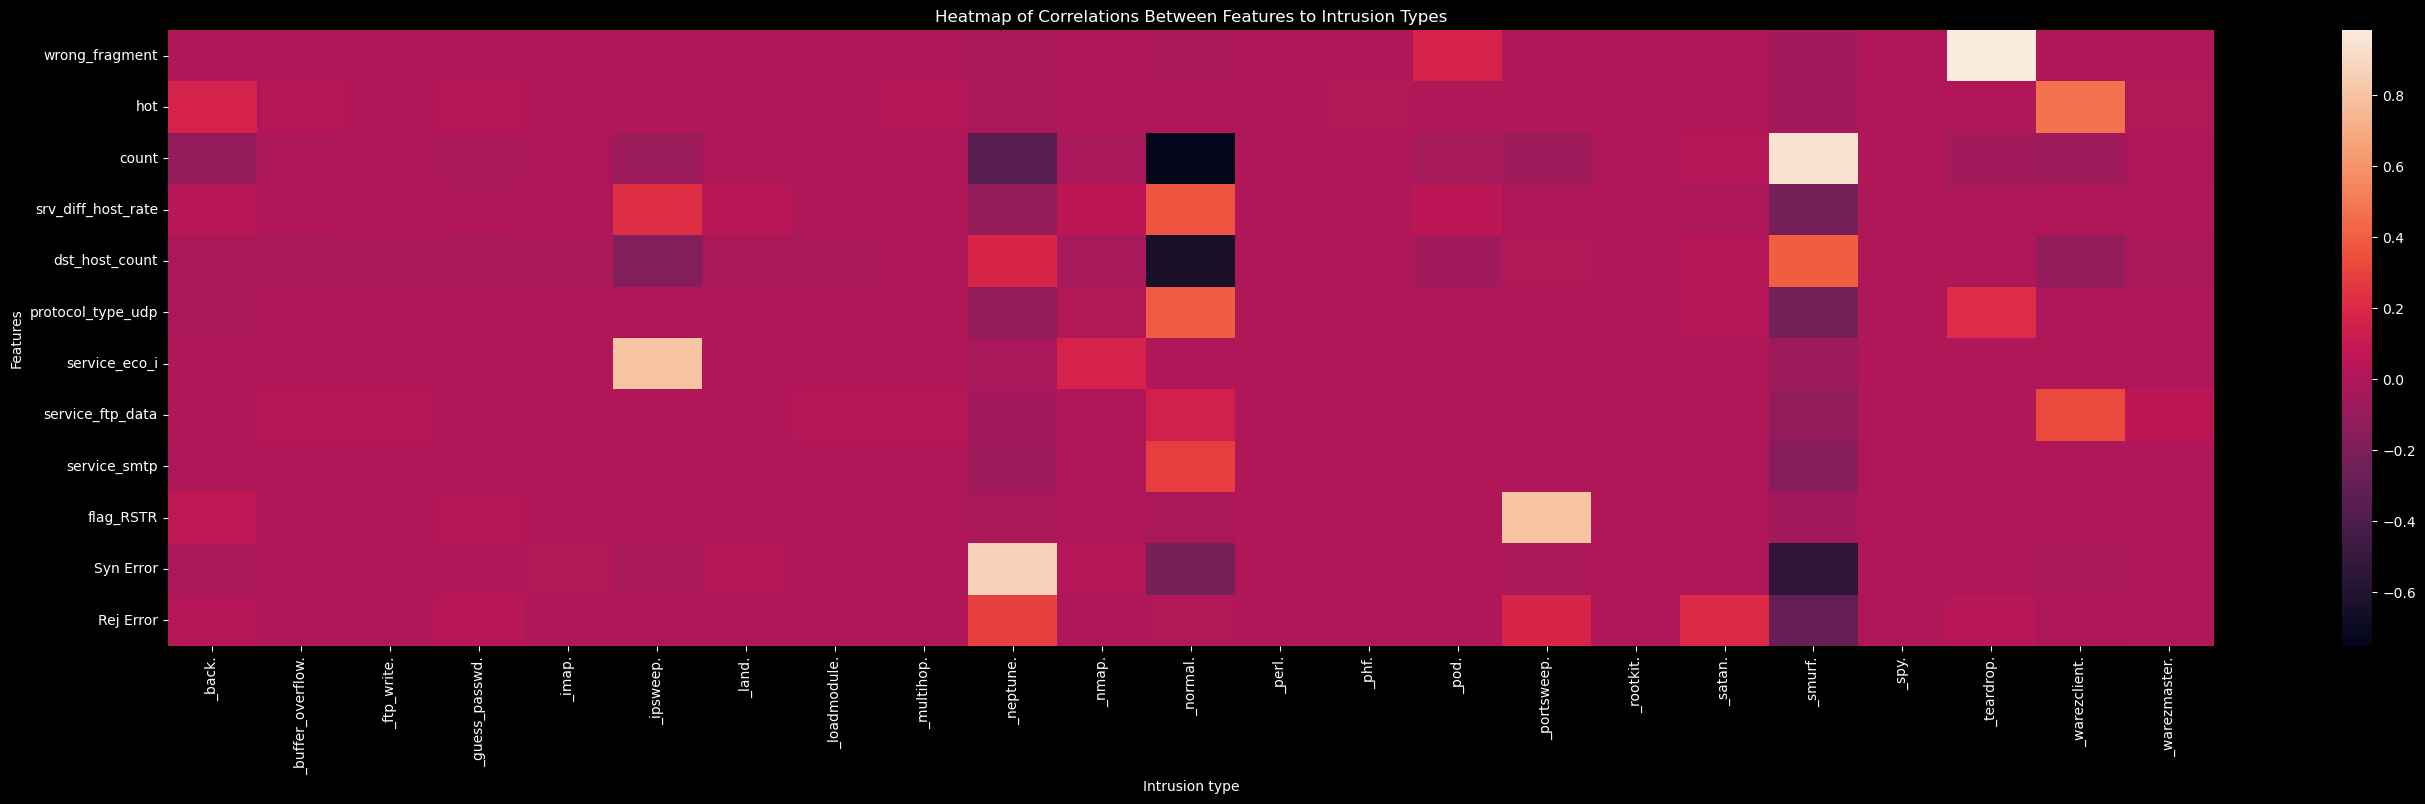

In [10]:
# create a matrix that stores each of the correlations between the clusters and labels
corr_matrix = np.zeros((23,12))

# Create dummy variables for all the different intrusion types.
lab_dummy = pd.get_dummies(small_df, columns = ['labels'],
                           prefix = [''])

# loop over the clusters
for k in tqdm(range(12)):
    # Loop over the different labels
    for label in range(12,35):
        # Assign each part of the matrix the correlation between label and cluster
        corr_matrix[label-12, k] = lab_dummy.iloc[:,k].T.corr(other = lab_dummy.iloc[:,label])

# Turn the correlation matrix into a dataframe so it will be easier to manipulate
corr_df = pd.DataFrame(corr_matrix, 
                       columns = lab_dummy.columns[:12],
                       index = lab_dummy.columns[12:])

#Back to darkmode for the eyes
plt.style.use('dark_background')
# Change the figure size so that all the intrusions types are legible
plt.figure(figsize = (33,8))
# Create a heatmap of correlation matrix to see each clusters highest intrusion correlations
sns.heatmap(corr_df.T);
# Label the axes
plt.xlabel('Intrusion type');
plt.ylabel('Features');
# Give a title
plt.title('Heatmap of Correlations Between Features to Intrusion Types');

This graph provides reassurance that certain features will be highly informative on the type of attack type but it doesn't give enough information on what creates an attack. To do that we can create clusters in the data that will be able to show how multiple different features can come together to create an attack. 

Another problem with this graph is that most of it is hovering around zero. This is because intrusions vary wildly in their frequency. Here is list of intrusions and the percent of observations in the data that they take up. 

In [16]:
# Give context to how much each intrusion occurs
print(c_f12['labels'].value_counts(normalize = True))

smurf.              0.568378
neptune.            0.216997
normal.             0.196909
back.               0.004459
satan.              0.003216
ipsweep.            0.002524
portsweep.          0.002105
warezclient.        0.002065
teardrop.           0.001982
pod.                0.000534
nmap.               0.000468
guess_passwd.       0.000107
buffer_overflow.    0.000061
land.               0.000043
warezmaster.        0.000040
imap.               0.000024
rootkit.            0.000020
loadmodule.         0.000018
ftp_write.          0.000016
multihop.           0.000014
phf.                0.000008
perl.               0.000006
spy.                0.000004
Name: labels, dtype: float64


Some of these intrusion types rarely happen so it is not surprising that there are no correlations on the heat map. One example is the intrusion type 'spy.' which is so rare that it happens just twice in 490,000+ observations

## **Clustering**


At first glance the different types of intrusions clearly fall into separate groups. On the original challenge's [webpage](https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html) the contest makers list 4 distinct groups:
- DOS: denial-of-service, e.g. syn flood;
- R2L: unauthorized access from a remote machine, e.g. guessing password;
- U2R:  unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;
- probing: surveillance and other probing, e.g., port scanning.

This makes sense. For example, portsweep and ipsweep are clearly in the probing group as they are types of sweeps that search for vulnerabilities. 

But we can't assume that intrusions of the same kind should be grouped together. It could be that a hacker would use ipsweep as a first step in a ping of death (pod) attack, while rarely ever using an ipsweep and portsweep in the same attack together. Without clear information on how to group the different intrusions, we need to use cluster analysis to provide a more rigorous analysis.

I also came up with my own grouping that has more specific groups than the competitions list of four. While the competition's grouping made sense, I thought that a method specific approach would be another potentially valid grouping. 

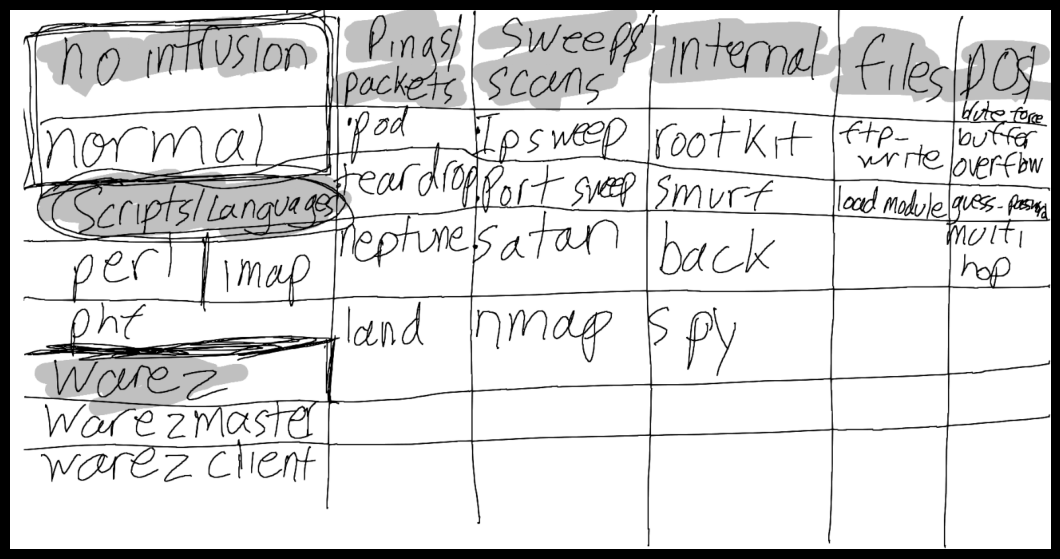

In [8]:
img = im.imread(r'./notebooks/Supernote/Potential Cluster Groupings.png');
fig, ax = plt.subplots(figsize=(25,7))
ax.imshow(img);
ax.axis('off')
plt.show();

My handwriting isn't great, All the highlighted cells are names of my groupings.

After splitting up the different intrusions into categories represented by the highlighted boxes above, it appeared that there were 8 tentative categories based on a casual sort through the types of intrusions. While there is nothing definitive about this grouping, it should give us an insight to put 8 clusters firmly within the range of the number of clusters that we should try. 

KPrototype is a clustering algorithm that takes both numerical and categorical data. I first need to both define the categorical features and make them categorical in order to run K-Prototype.

In [11]:
# Create list of categorical columns including binary in a list comprehension. 
cat_col = [col for col in X.columns if len(X[col].unique()) == 2]

# Convert binary columns into categorical columns because they represent two states more so than degrees
X[cat_col] = X[cat_col].astype('category')

# Get the index of the categorical columns
cat_col_index = [list(X.columns).index(col) for col in cat_col]

Next I have to determine gamma which is a weighting of the categorical variables against the numerical variables. There are 12 variables in total, 5 dummy variables but only three original categorical variables. This means that there were 10 original variables (12-5+3) and 3 original categorical variables therefore gamma = 0.3.

I set n_jobs to -1 so that my computer will dedicate all of its leftover processing to running the algorithm. It will take a while to run but it will give valueable insight.

In [5]:
def k_finder(x, min, max, gam, cat_index):
    # Initialize cost list
    cost = []
    # Iterate for different amounts of centroids
    for k in tqdm(range(min,max)):
        # Use K-Prototype to generate a model. These parameters can change but hopefully we find something good
        KProto = KPrototypes(n_clusters = k, init = 'Cao', n_init = 10, gamma = gam,  verbose = 0, n_jobs = -1)
        # Use the KPrototypes model on the actual data
        cluster_labels = KProto.fit_predict(x, categorical = cat_index)
        # Append cost to the cost list for graphing later
        cost.append(KProto.cost_) 

    # An elbow plot of k vs the cost function to try to find the optimal k
    plt.plot(range(min,max), cost, marker = 'o');
    # Label the x-axis
    plt.xlabel('Number of Clusters');
    # label the y-axis
    plt.ylabel('Dissimilarity');
    # Give the plot a title
    plt.title('Elbow Plot for KPrototypes');
    # Show the plot
    plt.show()

100%|██████████| 8/8 [4:21:19<00:00, 1960.00s/it]  


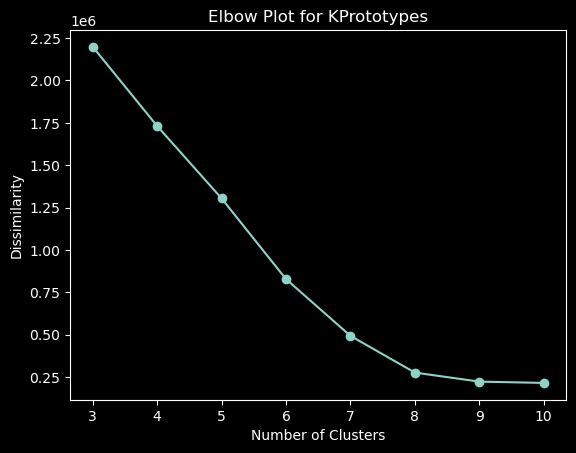

In [6]:
k_finder(X, 3, 11, 0.3, cat_col_index)

This result proves that 8 is the perfect number of clusters for this dataset. I did not record the cluster labels for each value of K so I will now run K-Prototype with $K = 8$ to use in the analysis 

In [38]:
# Use K-Prototype to generate a model. These parameters can change but hopefully we find something good
KProto = KPrototypes(n_clusters = 8, init = 'Cao', n_init = 10, gamma = 0.3,  verbose = 0, n_jobs = -1)
# Use the KPrototypes model on the actual data
cluster_labels = KProto.fit_predict(X, categorical = cat_col_index)
# Python uses zero indexing so this makes it simpler
cluster_labels += 1

Now I will save the clusters so that I don't have to spend 15 minutes waiting for the computer to calculate them every time I turn it on vscode.

In [40]:
# Make the clusters into a single column df for easy concatenation
clusters = pd.DataFrame({'K=8':cluster_labels})
# Combine the clusters and the features
c_f = pd.concat([X, clusters], axis = 1)
# Save this so that I don't have to keep running the clusters over and over again.
c_f.to_csv('./data/interim/Cluster_features.csv', index = False)

The first way to try to explore the clusters is finding a way to look at them. If they look like they form a clear structure, then it is another piece of evidence for their existance. Because the clusters themselves are in 12 dimensions, we need a way to reduce their dimensionality to a number that we can see. Principle component analysis (PCA) is a great way to reduce the different dimensions by taking the most important features and combining them into given number of dimensions. We can take all 12 features and combine them into 2 components and then graph those components to see the structure of the data.

In [14]:
# Import the cluster labels in their own variable for easy use
cluster_labels = c_f12['K=8']
# Create the PCA object since the data has already been scaled
pca = PCA(n_components = 2)
# create a data frame pca_vectors that has the two pca components 
pca_vectors = pd.DataFrame(pca.fit_transform(X), columns = ['1','2'])
# Combine the 2 components and the cluster that the label is a part of
pca_vectors = pd.concat([pca_vectors, cluster_labels], axis = 1)

With pca_vectors we now have a dataframe that has partially captured the relationships between the points in two dimensions and the cluster that they belong to so it will be easy to make a graph with each point's cluster color coded.

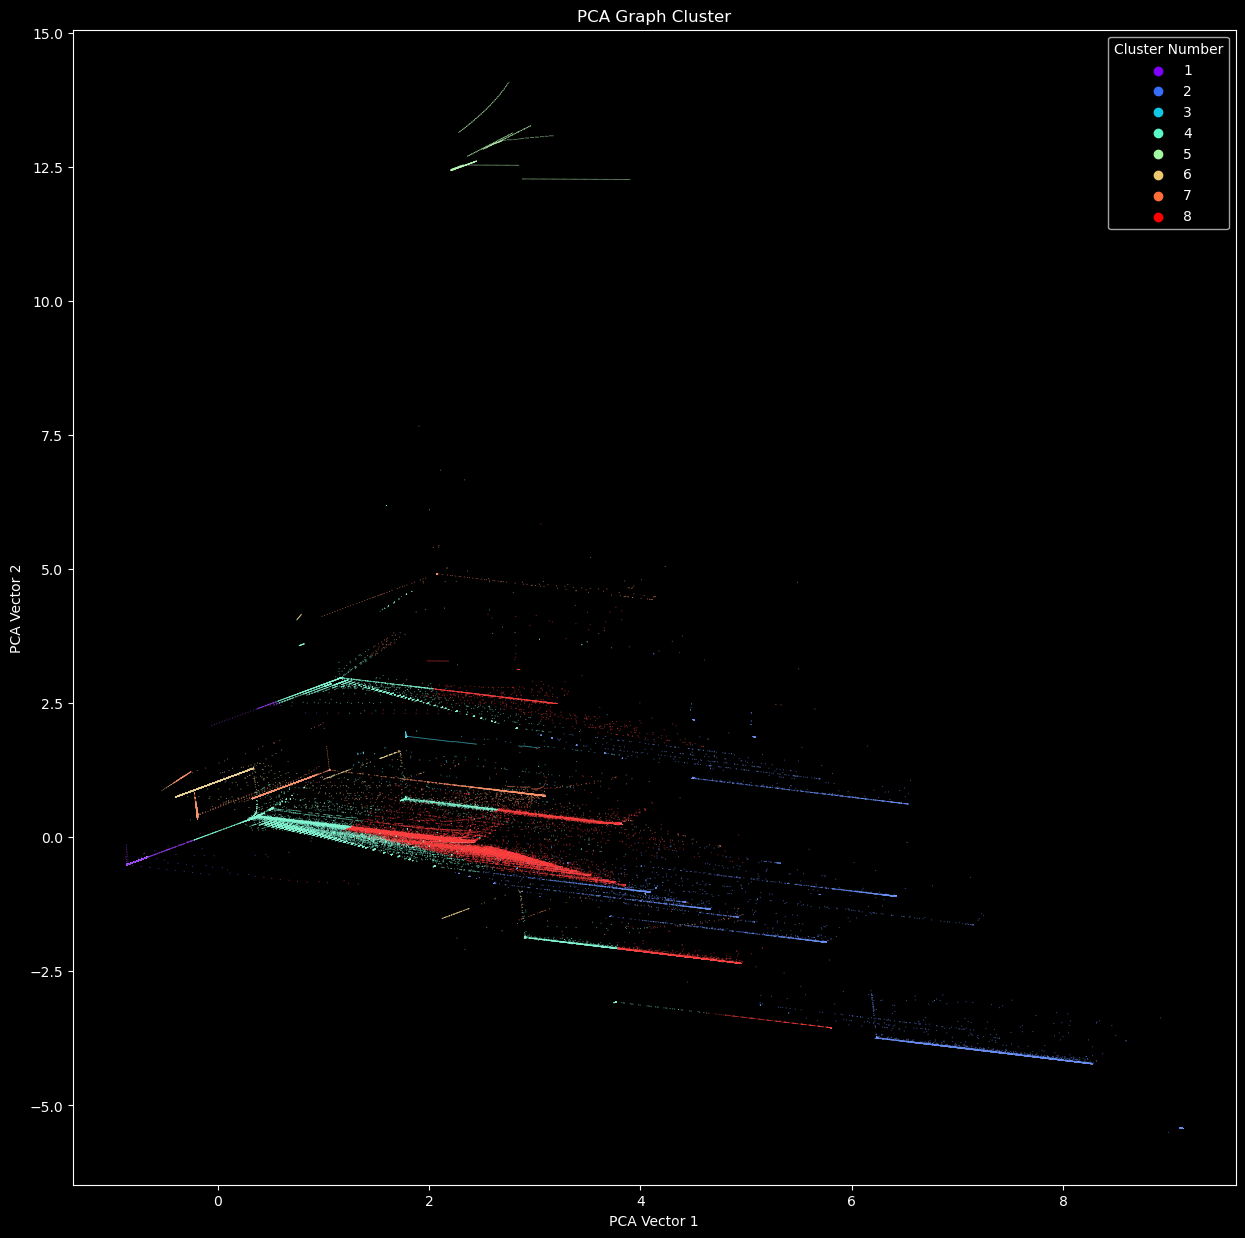

In [99]:
# Make the figure size a lot bigger
plt.figure(figsize = (15,15))
# Plot all the points that aren't in the second cluster
sns.scatterplot(data = pca_vectors, x = '1', y = '2',
                # Legend = full took forever to figure out so that it doesn't leave out clusters
                hue = 'K=8', palette = 'rainbow', legend = 'full',  
                # Make points smaller and clearer since so many points overlap
                s = 0.4, alpha = 0.7);
# Label the x-axis
plt.xlabel('PCA Vector 1');
# Label the y-axis
plt.ylabel('PCA Vector 2');
# Show a legend to see which cluster each color represents
plt.legend(title='Cluster Number');
# Give the plot a title
plt.title("PCA Graph Cluster");

This graph shows that there is clear structure in the data, it also gives the impression that data could be better visualized by using a 3rd dimension. I can use PCA to create 3 vectors instead of 2 to create a better graph and see if I am missing something in 2 dimensions.

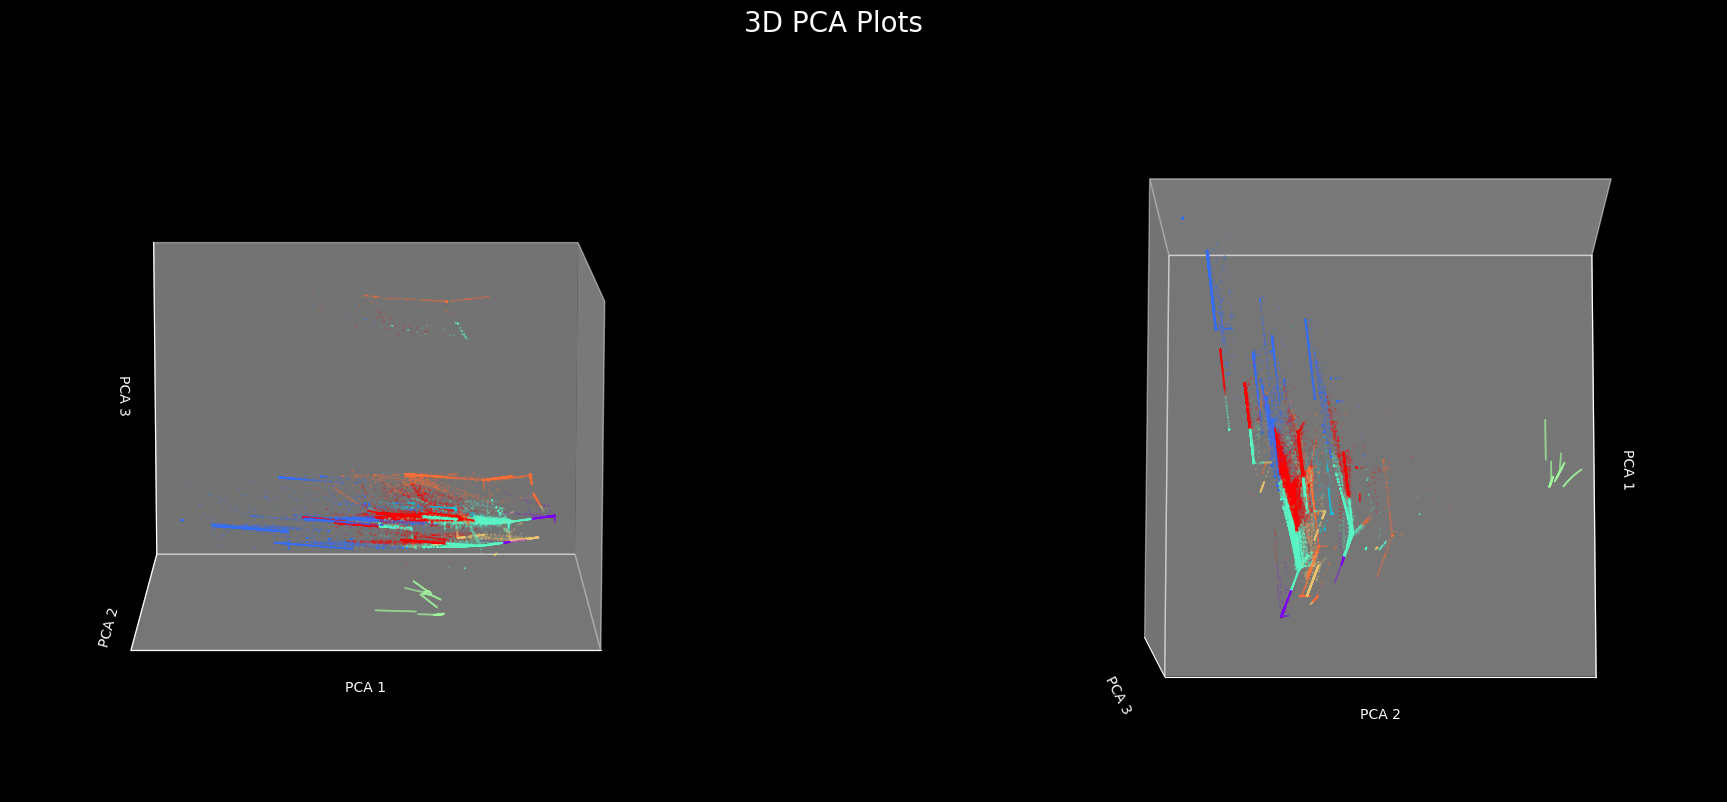

In [27]:
# Create the PCA object since the data has already been scaled
pca = PCA(n_components = 3)
# fit the data
pca_vectors = pca.fit_transform(X)
# Create subplots so that multiple angles can be shown
fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw=dict(projection='3d'), figsize = (24,9))
for i in range(2):
    ax[i].scatter(xs=pca_vectors[:,0], ys=pca_vectors[:,1], zs=pca_vectors[:,2], 
                       c=c_f['K=8'], s=.1, cmap='rainbow', alpha=.4) 
    # Label all the axes
    ax[i].set_xlabel('PCA 1', labelpad = .1)
    ax[i].set_ylabel('PCA 2', labelpad = .1)
    ax[i].set_zlabel('PCA 3', labelpad = .1)
    # Since values are meaningless in PCA, get rid of all the ticks
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_zticks([])


ax[0].view_init(elev=10, azim=90)
ax[1].view_init(elev=1000, azim=180)

legend_labels = [i for i in range(1,9)]


plt.suptitle('3D PCA Plots', fontsize = 20)

plt.show()

This is a much better view of the clusters but there are still some problems with this graph. This is because there is some information loss in PCA and the weighting in the KPrototype algorithm can also have an impact on which cluster each point is a part of. It also means that I need a more rigorous way of validating the existence of the clusters.

## Cluster Analysis


The most straightforward way to evaluate the structure is a silhouette score which measures the distance or dissimilarity from other cluster's centroids (center of the cluster) compared to the dissimilarity to its own centroid. The closer a point is to its own centroid, while being far away from other centroids, the clearer it is that the structure is clustered. Unfortunately, when I ran the computation in R, the dataset was so large that the dissimilarity matrix (store of all the distances) returned a 900+ GB vector. That is far outside the ability of my computer or any normal commercial computer to handle. Even if I were to use just a tenth of the dataset for a representative sample, that would still generate a 9+ GB vector. As such I have to use different algorithms that are not as direct but can still lend some insight into validity of the clustering structure. 

The algorithms that I chose are the: 

**<center> Adjusted Rand Index (ARI) </center>**

$$
\mathrm{ARI}(true, new) = \mathrm{ADJ}(\frac{Matching Pairs}{Total Pairs}) 
$$
- Where true is the "true value of the clusters, 
- new is the dataset it is being compared to, 
- A pair is each combination of cluster labels from the true, and new datasets, 
- ADJ is the adjustment, it corrects for the amount of pairs that will match out of pure chance
    
**<center> Normalized Mutual Index (NMI) </center>** 

$$
NMI = \frac{2 * I(true, new)}{H(true) + H(new)}
$$
- true: ibid
- new: ibid
- I(true, new) is a function that measure how much the two cluster sets have in common
- H(true) and H(new) are the entropy of the cluster labels. More simply it measures the distribution
    of clusters over the data. The more evenly distributed the clusters, the higher the entropy

 **<center> Fowlkes-Mallow Index (FMI) </center>**

$$
\text{FMI} = \frac{TP}{\sqrt{(TP+FP)(TP+FN)}}
$$
- TP is the number of pairs that have the same cluster label as the first set of labels,
- FP is the number of pairs that have the same cluster label as the second set of labels

The ARI measures the similarity between two sets of labels on a scale of -1 to 1 where negative values indicate clear difference and 1 is a perfect match. NMI and FMI are from 0 to 1 and also measure similarity. To test the structure of this dataset, I can take a representative sample, run the clustering algorithm on the sample and then compare the sample's clusters to the full dataset's labels. If there are no clusters and the data is random, then I will get two very different sets of labels that will have low similarity scores. I don't have a clear threshhold to determine if there are clusters in the data but the closer the scores are to 1, the higher the likelihood that the data has a clustered structure.

I ran the tests for K values 6 to 8 to evaluate what the best value of K is. The higher the scores, the better the value of K must be. I ran each of the algorithms five times on new samples and then averaged results to obtain the similarity scores.

In [42]:
# Initialize Rand Index, Normalized Mutual Index, Fowlkes-Mallow
Rand, NMi, FMi = [], [], []

for i in tqdm(range(5)):
    # Create Bootstrap dataset with the same index as before so that I can find the original clusters as well
    bootstrap = X.sample(frac = 0.2, replace = True)
    # Use K-Prototype to generate a model. These parameters can change but hopefully we find something good
    KProto = KPrototypes(n_clusters = 8, init = 'random', gamma = 0.3, n_init = 10, verbose = 0, n_jobs = -1)
    # Use the KPrototypes model on the actual data
    bootstrap_labels = KProto.fit_predict(bootstrap, categorical = cat_col_index)
    # Create Original Dataset's lables for bootstrapped data
    orig_value = [c_f['K=8'][i] for i in bootstrap.index]
    # Rand index calculation
    Rand.append(adjusted_rand_score(orig_value, bootstrap_labels))
    # Normalized Mutual index calculation
    NMi.append(normalized_mutual_info_score(orig_value, bootstrap_labels))
    # Fowlkes Mallow Index calculation
    FMi.append(fowlkes_mallows_score(orig_value, bootstrap_labels))

# Print out the results for each Value of K
print(f"Adjusted Rand Index: {np.mean(Rand)}     Normalized Mutual Index: {np.mean(NMi)}     Fowlkes Mallow Index: {np.mean(FMi)}")

100%|██████████| 5/5 [10:03<00:00, 120.61s/it]

Adjusted Rand Index: 0.9999666573803745     Normalized Mutual Index: 0.9996983085994436     Fowlkes Mallow Index: 0.9999790796948297


I wasn't conviced that the similarity scores are valid proofs for the existence of a structure. As such I created a completely random dataset and ran the same test as above to see what would happen if there were no clusters. Since all of the scores were significantly lower than my dataset, this method is solid.

In [44]:
# Test a random dataset's similarity score
# set random seed for reproducibility
np.random.seed(123)

# create categorical columns
cat_col1 = pd.Series(np.random.choice(['A', 'B', 'C'], size=1000))
cat_col2 = pd.Series(np.random.choice(['X', 'Y', 'Z'], size=1000))

# create numerical columns
num_cols = pd.DataFrame(np.random.randn(1000, 8), columns=['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6', 'Num7', 'Num8'])

# concatenate categorical and numerical columns
df = pd.concat([cat_col1, cat_col2, num_cols], axis=1)

# set column names for categorical columns
df.columns = ['Cat1', 'Cat2', 'Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6', 'Num7', 'Num8']

# Perform the clustering for the dataset
KProto = KPrototypes(n_clusters = 8, init = 'cao', n_init = 10, verbose = 0)
# Use the KPrototypes model on the actual data
labels = KProto.fit_predict(df, categorical = [0,1])


# Create Bootstrap dataset with the same index as before so that I can find the original clusters as well
bootstrap = df.sample(frac = 0.2, replace = True)

# Re run the clustering for the sample
KProto = KPrototypes(n_clusters = 8, init = 'random', n_init = 10, verbose = 0)
# Use the KPrototypes model on the actual data
bootstrap_labels = KProto.fit_predict(bootstrap, categorical = [0,1])

# Create Original Dataset's lables for bootstrapped data
orig_value = [labels[i] for i in bootstrap.index]

# Rand index calculation
Rand = adjusted_rand_score(orig_value, bootstrap_labels)

# Normalized Mutual index calculation
NMi = normalized_mutual_info_score(orig_value, bootstrap_labels)

# Fowlkes Mallow Index calculation
FMi = fowlkes_mallows_score(orig_value, bootstrap_labels)

print(f"Adjusted Rand Index: {Rand}")
print(f"Normalized Mutual Index: {NMi}")
print(f"Fowlkes Mallow Index: {FMi}")

Adjusted Rand Index: 0.18599893493315675
Normalized Mutual Index: 0.34959850252909774
Fowlkes Mallow Index: 0.289448260165949


Now that we have cluster labels, we can see how those cluster labels interact with different types of intrusions. First, I plotted a histogram of different types of intrusions and colored each observation with the its cluster. Hopefully the different intrusion types fully belong to a single clusters, although if the graph isn't that clean, there are still other ways to analyze the clusters.

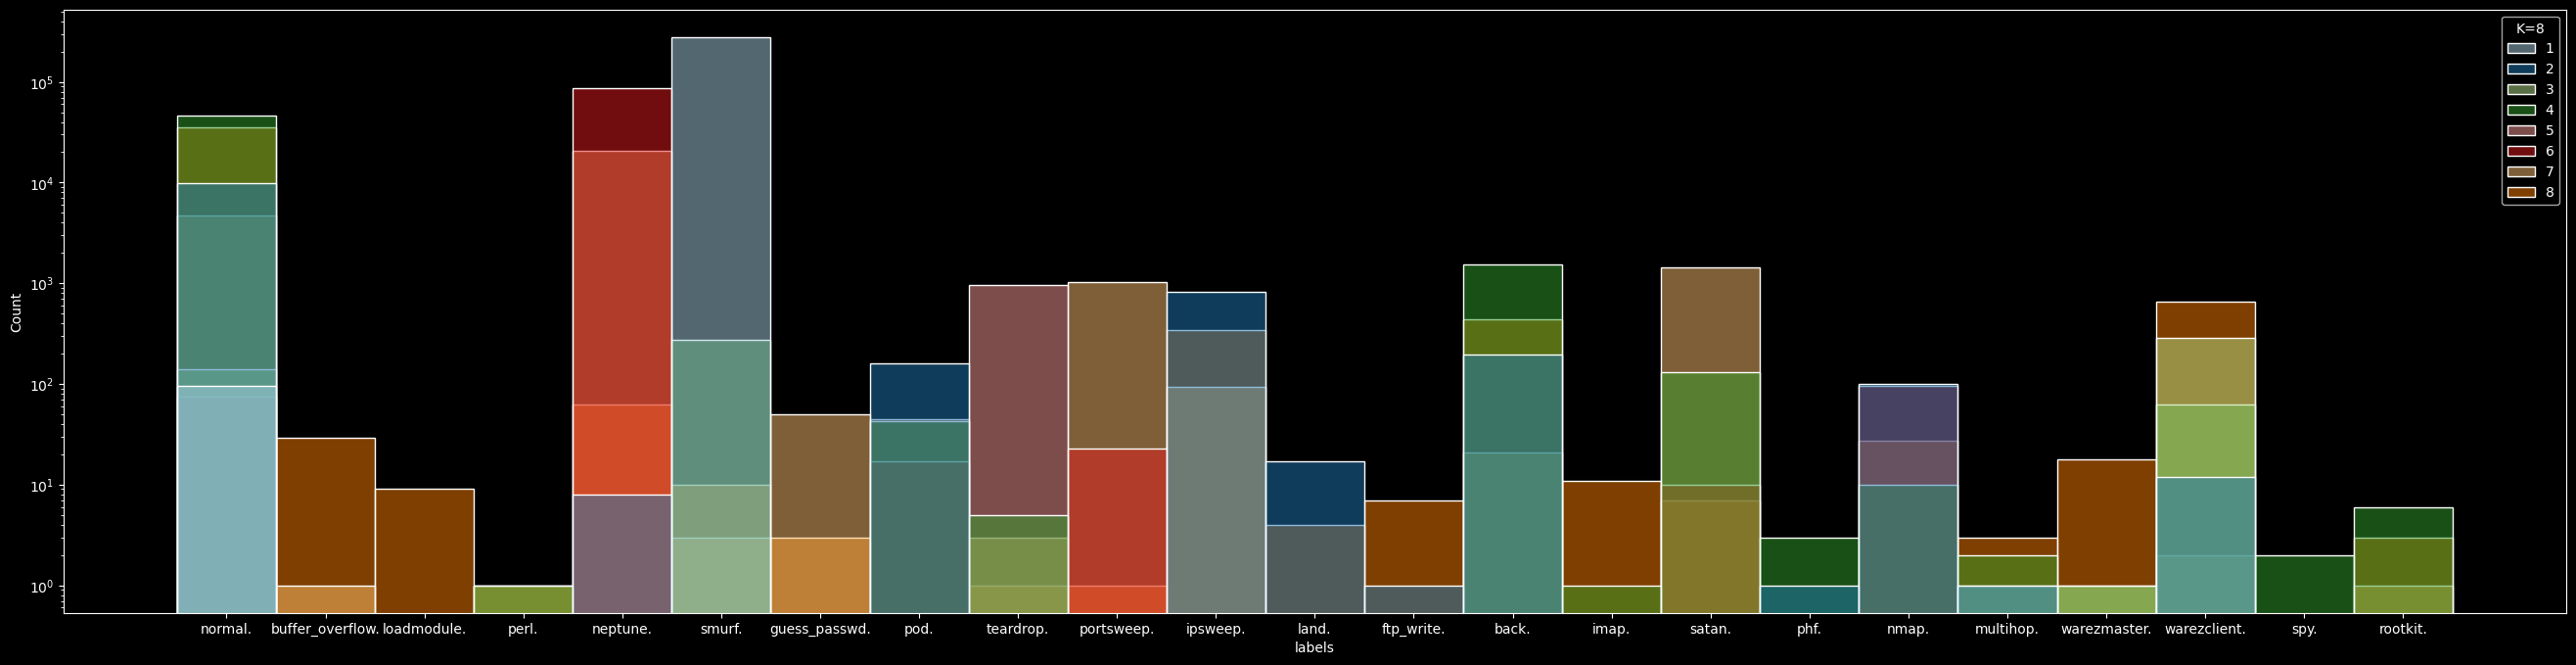

In [17]:
# Change figure size so that the x tick marks are readable
plt.figure(figsize = (33,8))

# Create a histogram of the types of network intrusions including non-intrusions
sns.histplot(data = c_f12, x = 'labels', hue = cluster_labels, palette = 'Paired')

# Set the scale to log so that we can have a much better visualization of the attacks
plt.yscale('log')

This result doesn't look to promising. All of the clusters appear to be for the most part scattered amongst the different attack types. Because the histogram is in log scale, some of the columns are actually really small. For instance, there are only two instances of "spy" in the entire dataset. While both of observations "spy" belong to the same cluster, there is still a 1/8 chance that would have happened randomly. To gain a better sense of how the clusters relate to intrusions we can make a histogram of the clusters and color it with the intrusions. 

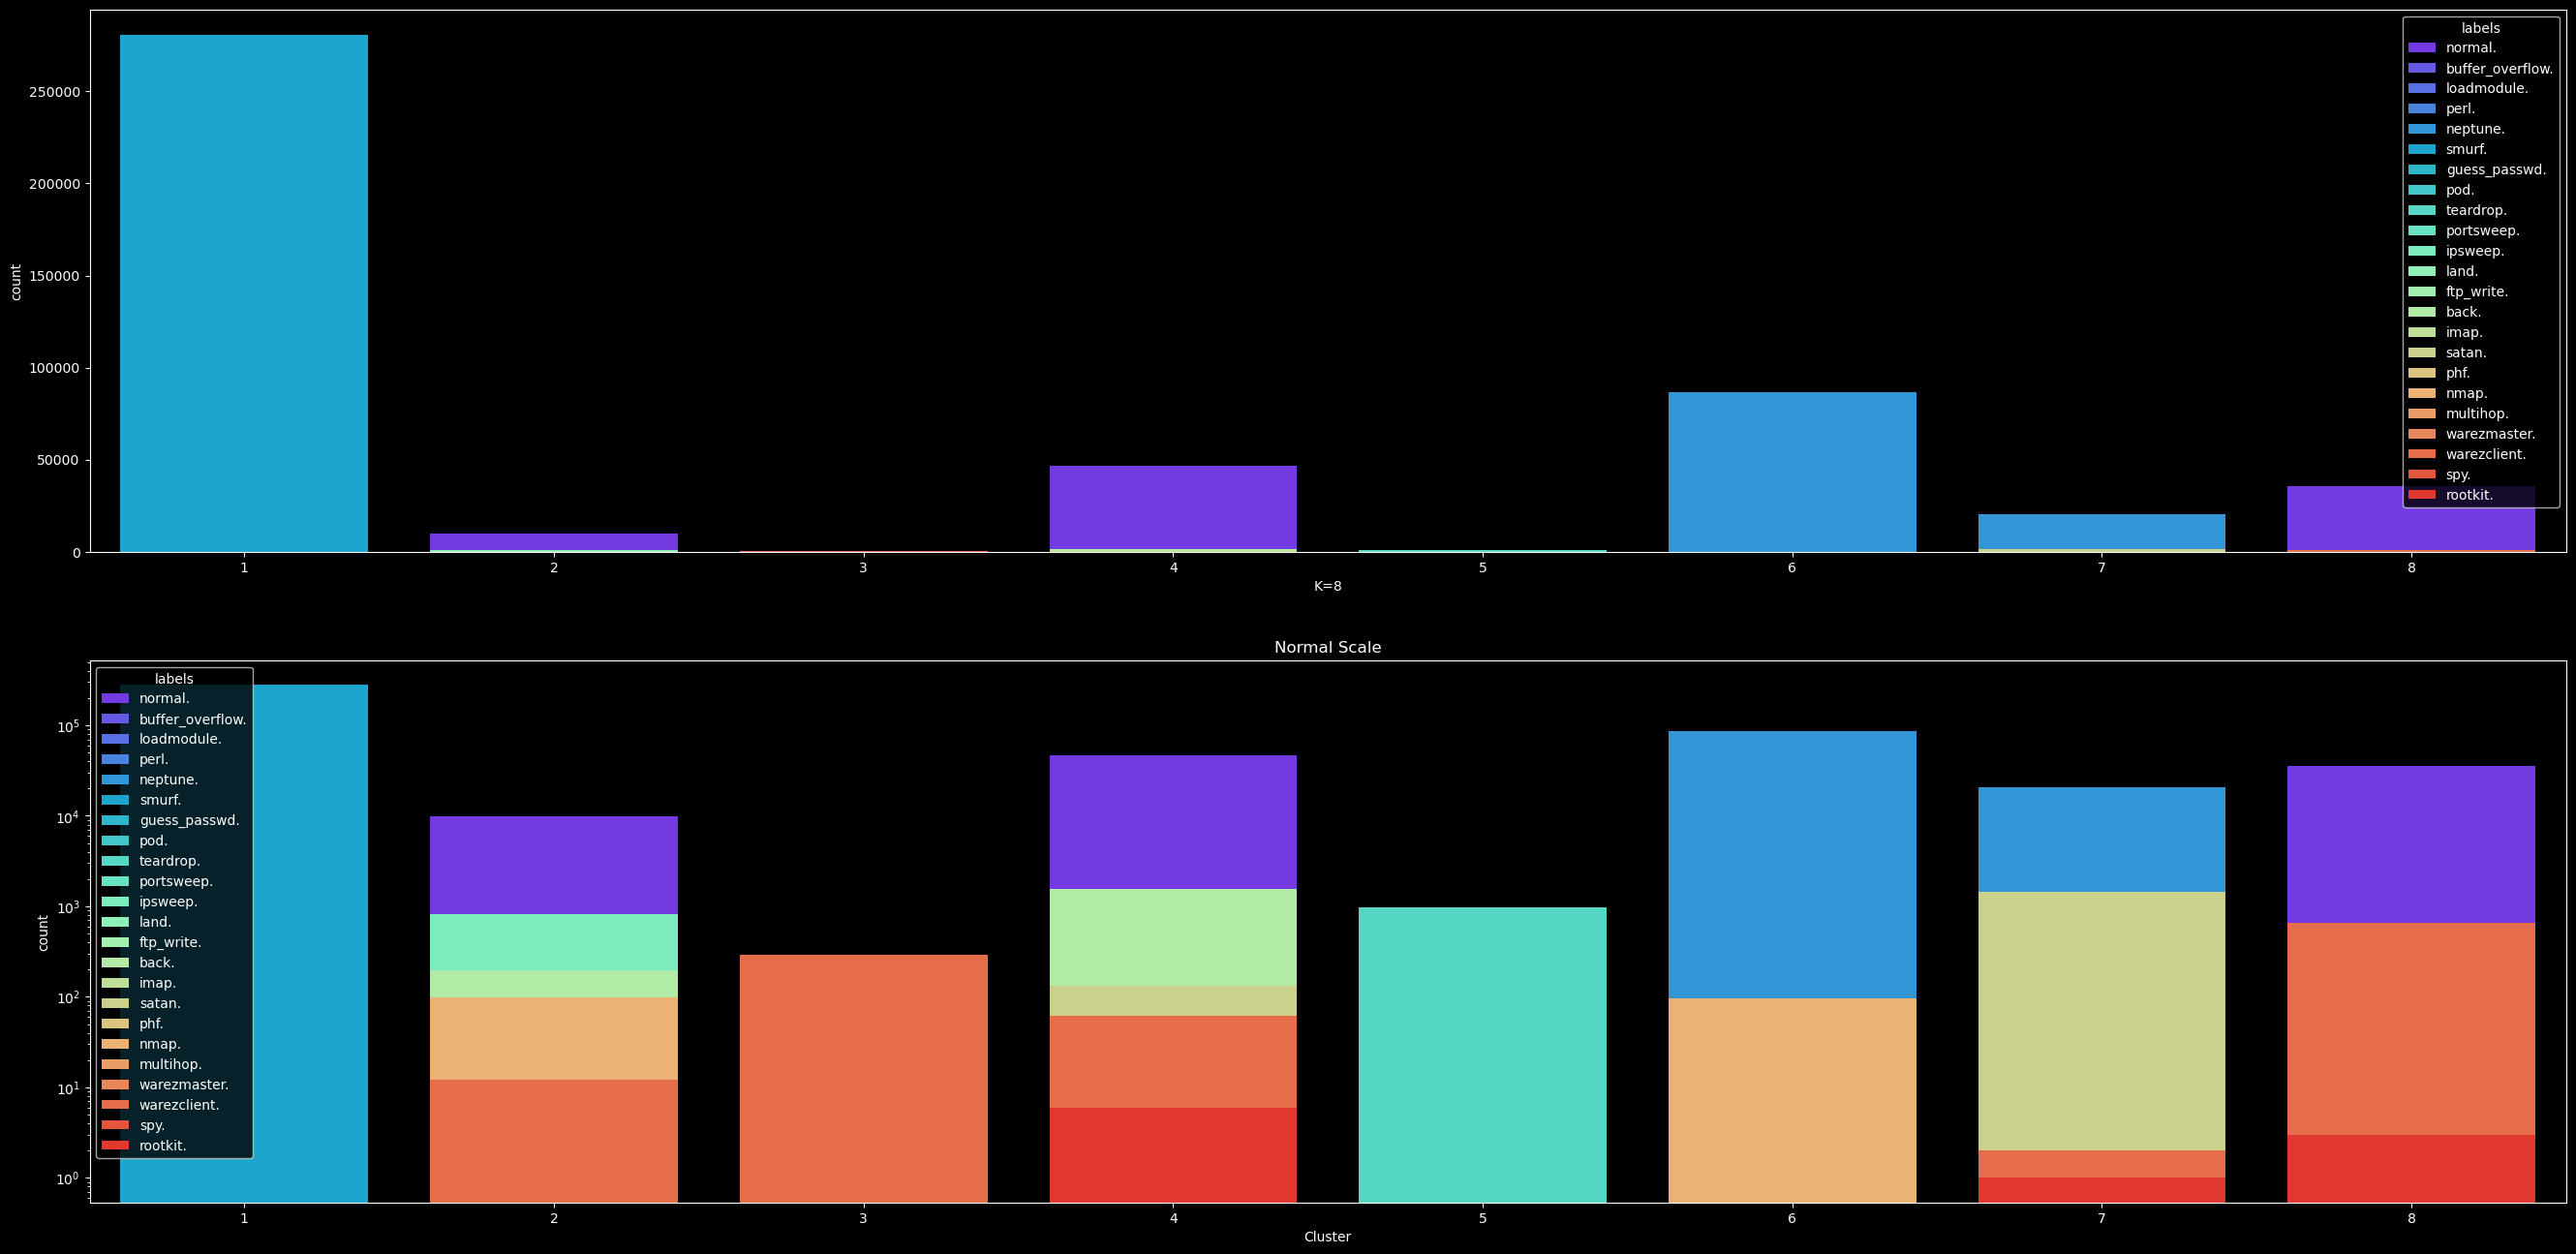

In [18]:
# Create subplots object so that both the log and normal version are availabel
fig, ax = plt.subplots(2,1,figsize = (33,16));


# Create the countplot with clusters and color the clusters with the intrusions
sns.countplot(ax = ax[0], data = c_f12, x = 'K=8', hue = 'labels',
# Use Dodge for thick lines and rainbow for high contrast
              dodge = False, palette = 'rainbow');
# Label the axes
ax[0] = plt.xlabel('Cluster');

# Create the countplot with clusters and color the clusters with the intrusions
sns.countplot(ax = ax[1], data = c_f12, x = 'K=8', hue = 'labels',
# Use Dodge for thick lines and rainbow for high contrast
                      dodge = False, palette = 'rainbow');
ax[1] = plt.xlabel('Cluster');

# Change the scale for the second plot to log so that the intrusions are visible
ax[0] = plt.yscale('linear')
ax[1] = plt.yscale('log');

# Title the two plots
plt.title('Normal Scale');
#ax[1] = plt.title('Log Scale');

These two histograms show the power of the clusters. In the first histogram, we can see that clusters 2, 4 and 8 are almost always safe connections. With the second graph we can see that the rest of the clusters including the ones that are hardly visible in the first graph are filled with intrusions. Next we can make a heatmap with the odds that an attack will happen in a given cluster. 

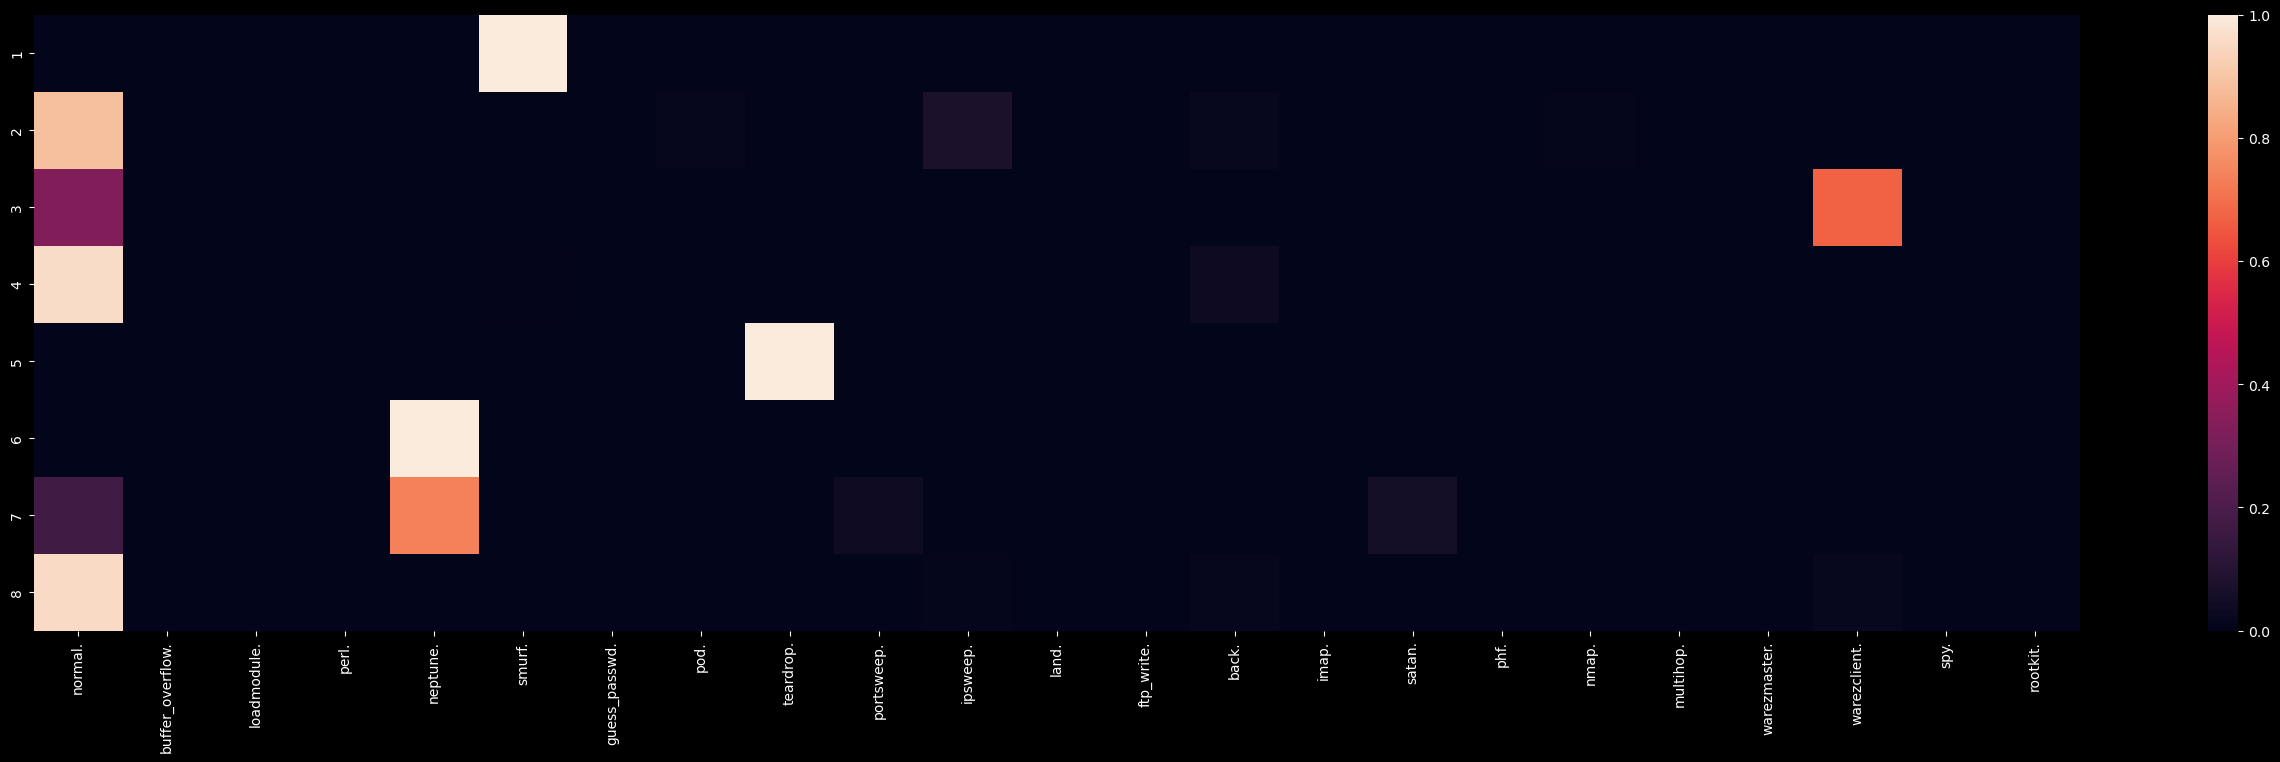

In [19]:
# create a matrix of values
odds_df = pd.DataFrame(index = c_f12['K=8'].unique(), columns = c_f12['labels'].unique())
# Loop through all of the cluster values
for k in c_f12['K=8'].unique():
    # create a value counts object for each cluster value of the amount of intrusions of each type
    vc = c_f12.loc[c_f12['K=8'] == k, 'labels'].value_counts(normalize = True) # type: ignore
    # Iterate through all the intrusions in vc
    for lab in vc.index:
        # add the count of intrusion of that type for that cluster to the specific cell in the dataframe
        odds_df.loc[k, lab] = vc[lab]

# Sort the index so that the heatmap is labelled 1 through 8
odds_df = odds_df.fillna(0).sort_index()
# Change the figure size to accomodate shape of dataframe
plt.figure(figsize= (33,8))
# Use a heatmap to plot the the dataframe
sns.heatmap(odds_df);

This graph does a great job of showing the expectations of an intrusion given a certain cluster. The fact that 1,5, and 6 are completely dark on the normal column shows that they are always dangerous. 2, 4, and 8 are much lighter and as such have less to worry about. It is important to keep in mind that 'normal.', 'neptune.', and 'smurf.' make up over 98% of the dataset. The reason that so much of this graph is dark is because there isn't enough attacks to give the clusters a chance to work. One example of this is spy which was only found in one cluster but had only 2 observations in the entire dataset.

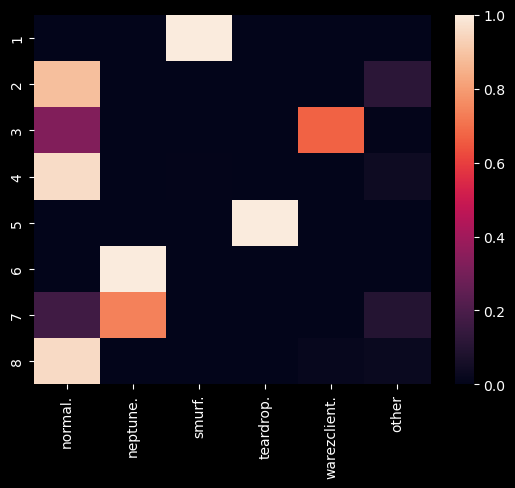

In [20]:
# List all the columns without any high values and store them in other variable
others = ['buffer_overflow.', 'loadmodule.', 'perl.', 
          'guess_passwd.', 'pod.', 'portsweep.',
          'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.', 'phf.',
          'nmap.', 'multihop.', 'warezmaster.',  'spy.',
          'rootkit.']
# Create 'other' column as the sum of all the others columns in the dataset
odds_df['other'] = odds_df[others].sum(axis = 1)
# Create a heatmap with other instead of the rest of the columns to concentrate information.
sns.heatmap(odds_df[['normal.', 'neptune.','smurf.','teardrop.','warezclient.', 'other']]);

With this graph we can see that the clusters have clear predictive ability.  The most obvious step is to investigate what makes these clusters interesting. By using groupby function we can group all the observations into their respective clusters and see if any of the means of the featrues of the clusters stand out.

In [14]:
# Create groupby object
clustered = c_f.groupby('K=8').mean()
# Create scaler so that it is easier to analyze the grouped data
scaler = StandardScaler()
# fit the scaler to the grouped data
scaler.fit(clustered)
# Transform the data into a scaled dataframe with the features as column names and clusters 1 through 8 as the index
clustered_scaled = pd.DataFrame(scaler.transform(clustered), columns = X.columns, index = range(1,9))

The original dataframe had much larger numbers but when I made a heatmap, the large numbers overwhelmed the graph making it hard to see what made each cluster. After scaling the numbers, we can create a heatmap to see what the clusters are made of. 

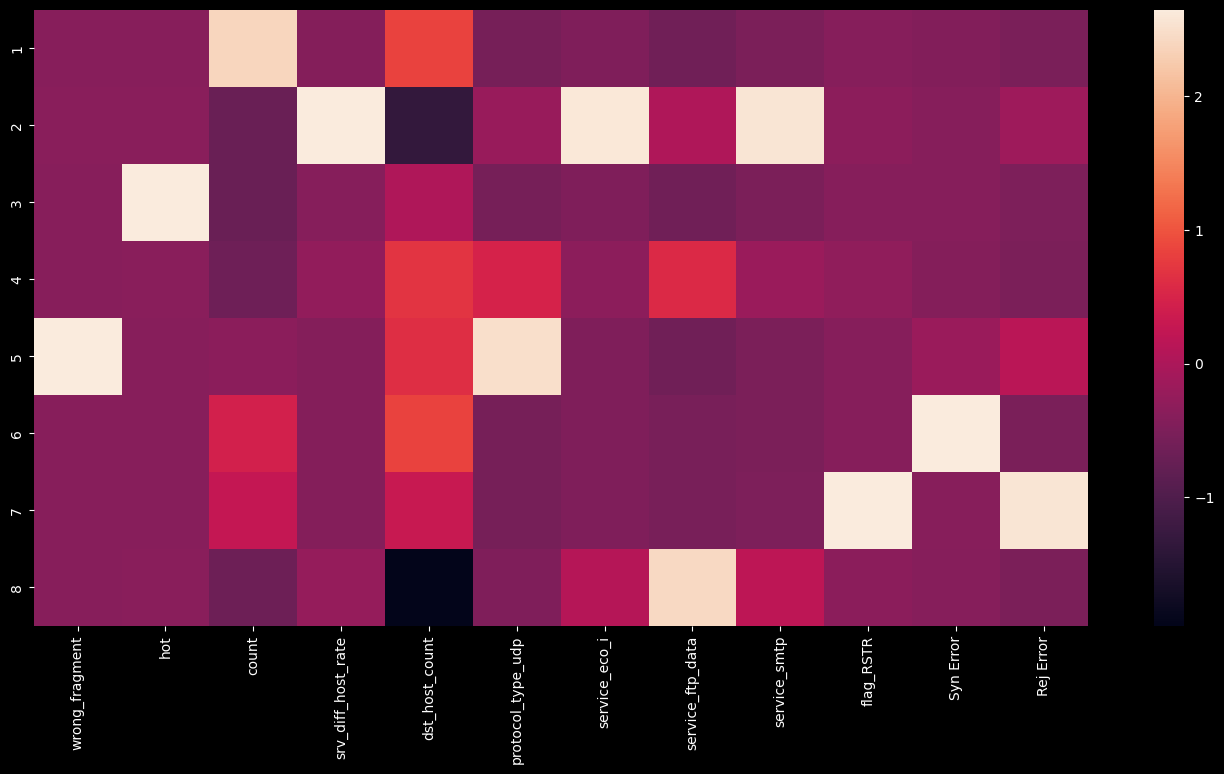

In [147]:
# Change the figure size to fit the dataframe
plt.figure(figsize=(17,8))
# Create a heatmap of clustered_scaled
sns.heatmap(clustered_scaled);

This beautiful graph shows the combination of features that make attack types. Below I have printed out the percent chance each cluster has of being each attack type. With the graph above and the odds below I can provide key information on what creates dangerous situations and what is more normal.

In [145]:
# Print out all the odds with the rare types all summed into a single column.
odds_df[['normal.', 'neptune.','smurf.','teardrop.','warezclient.', 'other']]

,normal.,neptune.,smurf.,teardrop.,warezclient.,other
1,0.000342,0.00000,0.999658,0.000000,0.000000,0.000000
2,0.883967,0.00071,0.000000,0.000000,0.001065,0.114258
3,0.325581,0.00000,0.000000,0.000000,0.669767,0.004651
4,0.957344,0.00000,0.005590,0.000102,0.001270,0.035693
5,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
6,0.000852,0.99748,0.000000,0.000000,0.000000,0.001669
7,0.168060,0.73710,0.000108,0.000108,0.000072,0.094552
8,0.954880,0.00169,0.000268,0.000027,0.017598,0.025538


The importance of the clusters is revealed. Before if we were to regress all of the features on the attack types we may have a slight understanding of specific features that cause intrusions but now we have combinations of features either being low or high that gives us much more insight. When we put together the observations from the histograms we can come to the conclusions for each cluster that:

- Cluster 1: High count, slightly elevated dst_host_count --> 99.9658% chance of being a smurf attack, .0342% are normal
- Cluster 2: High srv_diff_host_rate, low dst_host_count, high service_eco_i, or high service_smtp  --> 88.3967% of being normal, 
    11.4258% of rare attack type, tiny chance of neptune or warezclient
- Cluster 3: High hot --> 66.9767% Warezclient, 32.5581% normal
- Cluster 4: Nothing major --> 95.7344% normal, 3.5693% rare attack types, slight instances of everything but neptune
- Cluster 5: High wrong_fragment, high protocol_type_udp --> 100% teardrop.
- Cluster 6: High Syn_Error --> 99.748% Neptune, slight chance of rare type or normal
- Cluster 7: High flag_RSTR, High Rej_Error --> 73.710% Neptune, 9.4552% raretype, slight chance of all the types, 16.8060% normal
- Cluster 8: Low dst_host_count, high service_ftp_data --> %95.4880 normal, everything else is under 2.6%, barely any for teardrop or smurf.


### **Feature Selection**

With all the insights that the clusters provide, now comes the question of do they provide additional information when added to predictive models. To do this we can bring back the Lasso regularization from data wrangling to see if they have predictive power.

In [7]:
X = c_f12.drop('labels', axis = 1) 
y = np.where(small_df['labels'] == 'normal.', 0, 1)
# Find the coefficients of lasso regularization
lasso = Lasso(alpha = 0.007157894736842105)
# Fit the lasso regularization to the data 
lasso.fit(X,y)
# Create a dictionary of all the features and their corresponding lasso coefficients
lasso_dict = {X.columns[i]:lasso.coef_[i] for i in range(len(X.columns))}
# Print the features and coefficients
print(lasso_dict)
# Print the number of features are left from lasso
print(len(lasso_dict))

{'wrong_fragment': 0.02899928518919563, 'hot': 0.018796984324197383, 'count': 0.34090759865173964, 'srv_diff_host_rate': -0.0010966591021569763, 'dst_host_count': 0.05248752480561385, 'protocol_type_udp': -0.025841214430797385, 'service_eco_i': 0.036867508207678854, 'service_ftp_data': 0.0012078407476293976, 'service_smtp': -0.0037662773388168745, 'flag_RSTR': 0.010856179176343073, 'Syn Error': 0.189613687257752, 'Rej Error': 0.08588430004458836, 'K=8': 0.0}
13


It is clear that the clusters add no information when it comes to predictive models.

## **More Data**

The feature selection process until now used a lasso regression that regularized between normal and non normal labels in the data. It had no data that solely distinguished between the different attack types. This next section attempts to try the clustering algorithm with the extra data. First we can create a correlation heatmap to see if there are any obvious correlations that weren't in the first dataset.

100%|██████████| 61/61 [00:10<00:00,  5.65it/s]


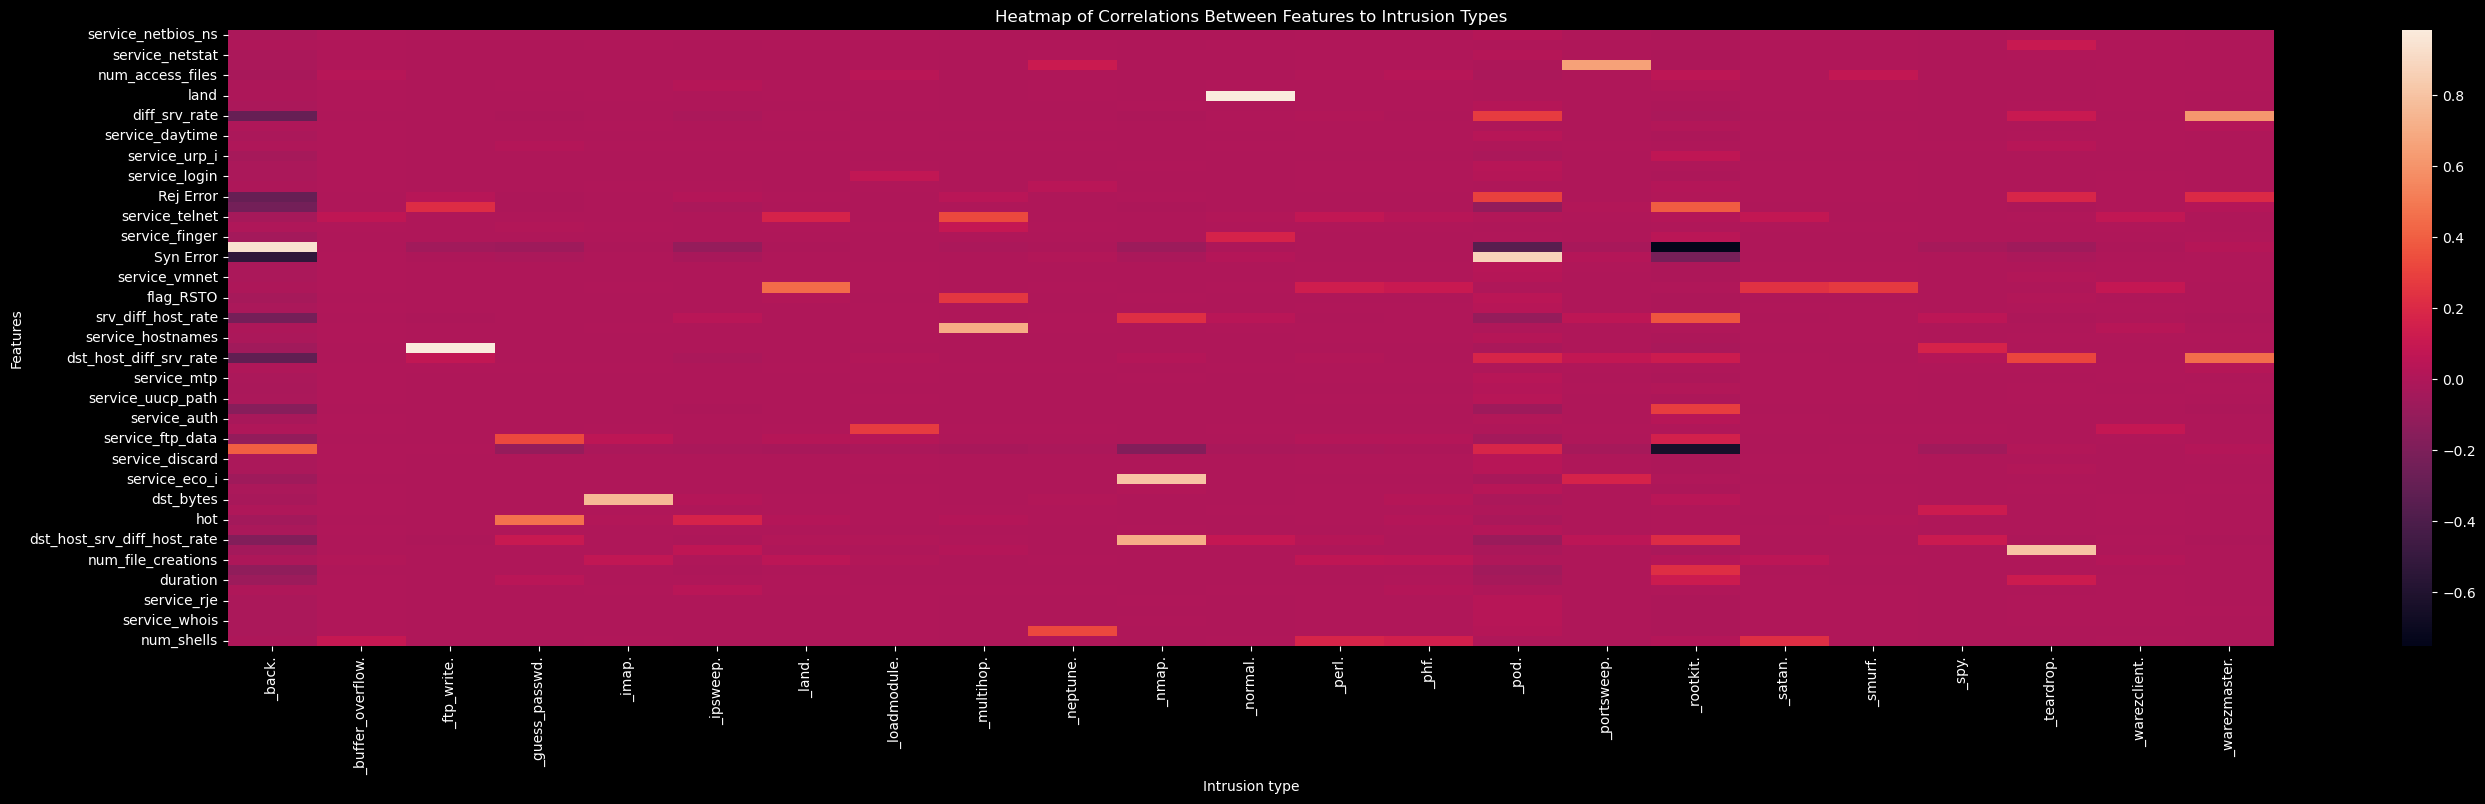

In [22]:
# create a matrix that stores each of the correlations between the clusters and labels
corr_matrix = np.zeros((23,61))

lab_dummy = pd.get_dummies(big_df, columns = ['labels'],
                           prefix = [''])

# loop over the clusters
for k in tqdm(range(61)):
    # Loop over the different labels
    for label in range(61,84):
        # Assign each part of the matrix the correlation between label and cluster
        corr_matrix[label-79, k] = lab_dummy.iloc[:,k].T.corr(other = lab_dummy.iloc[:,label])

# Turn the correlation matrix into a dataframe so it will be easier to manipulate
corr_df = pd.DataFrame(corr_matrix, 
                       columns = lab_dummy.columns[:61],
                       index = lab_dummy.columns[61:])



#Back to darkmode for the eyes
plt.style.use('dark_background')
# Change the figure size so that all the intrusions types are legible
plt.figure(figsize = (33,8))
# Create a heatmap of correlation matrix to see each clusters highest intrusion correlations
sns.heatmap(corr_df.T);
# Label the axes
plt.xlabel('Intrusion type');
plt.ylabel('Features');
# Give a title
plt.title('Heatmap of Correlations Between Features to Intrusion Types');

There appears to be slightly more information here than there was the first time that I ran the correlation heatmap. We can try to do the same process with this dataset as with the 12 feature dataset. 

There are 61 variables and 40 dummy variables from 3 categorical features. This means that the dataset had 24 total variables and 21 of them were numerical. Therefore gamma which is the weight for categorical vs. numerical features is 0.125,  

In [7]:
# Separate out the features for clustering
x_data = big_df.drop('labels', axis = 1)

In [9]:
# Define the prefix for all of the categorical columns
cats = ['service', 'flag', 'protocol_type']
#Initialize the list of categorical columns
cats_cols = []
# Iterate over all the different categorical prefixes
for prefix in cats:
    # Filter out every column that starts with the current prefix
    cols = x_data.filter(regex=prefix).columns
    # Assign all of those columns to categories
    x_data[cols] = x_data[cols].astype('category')
    # Create a list with the all the indeces of those column names
    cols = list(x_data.columns.get_indexer(cols))
    # input those indeces into the cats list
    cats_cols.extend(cols)


# Find out how much of the dataset is categorical vs numerical
print("Gamma is: ", 3/(len(x_data.columns)- len(cats_cols) + 3))


Gamma is:  0.125


Since the first dataset had 8 clusters I will start at with the assumption of 6 and then go up to 10 as there may be some more clusters that get created from this.

100%|██████████| 10/10 [3:54:11<00:00, 1405.16s/it] 


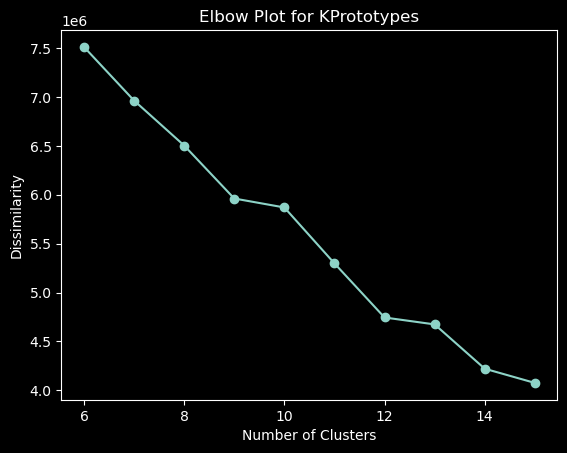

In [10]:
# Run K_finder to see the optimal number of clusters.
k_finder(x_data, 6, 16, 0.125, cats_cols)

The amount of time to process each cluster went up as K increased which meant that it would be almost impossible to find out the optimal number of clusters in a reasonable amount of time. I can still use PCA to see if there is any reason to continue down the path of trying to find clusters in this larger dataset.

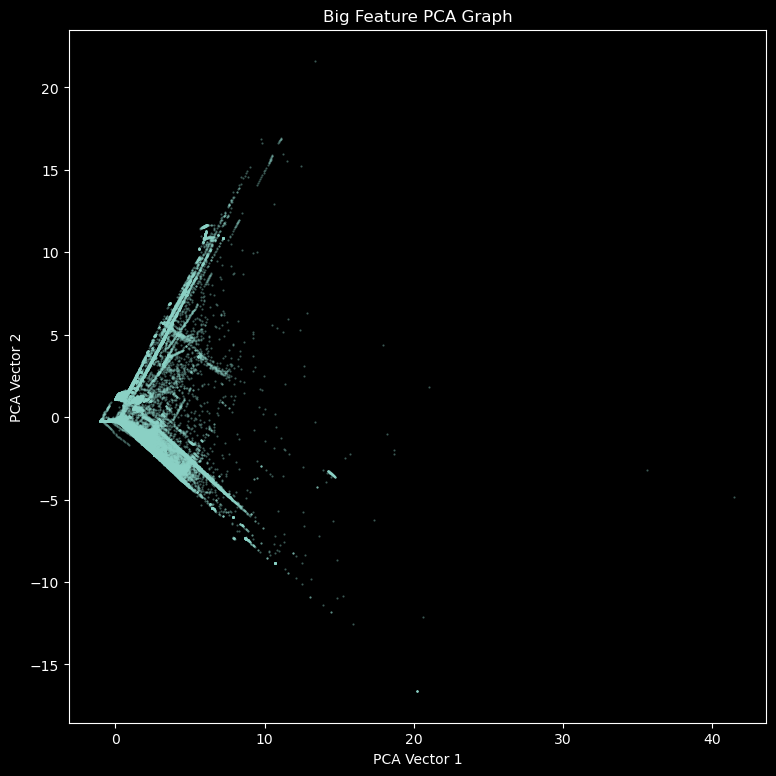

In [25]:
# Create the PCA object since the data has already been scaled
pca = PCA(n_components = 2)
# fit the data

pca_vectors = pca.fit_transform(x_data)

fig = plt.figure(figsize = (9, 9));
# Create a scatter plot representing the PCA transformation
plt.scatter(pca_vectors[:,0], pca_vectors[:,1], 
            s = 0.3, alpha = 0.4);
# Label the axes in the graph
plt.xlabel('PCA Vector 1');
plt.ylabel('PCA Vector 2');
# Give the plot a title
plt.title('Big Feature PCA Graph');

This graph does not look as though there is a clustered structure in this dataset. I can try to do what I did before an look at a 3-D version to see if there is another angle in which the clusters are hiding.

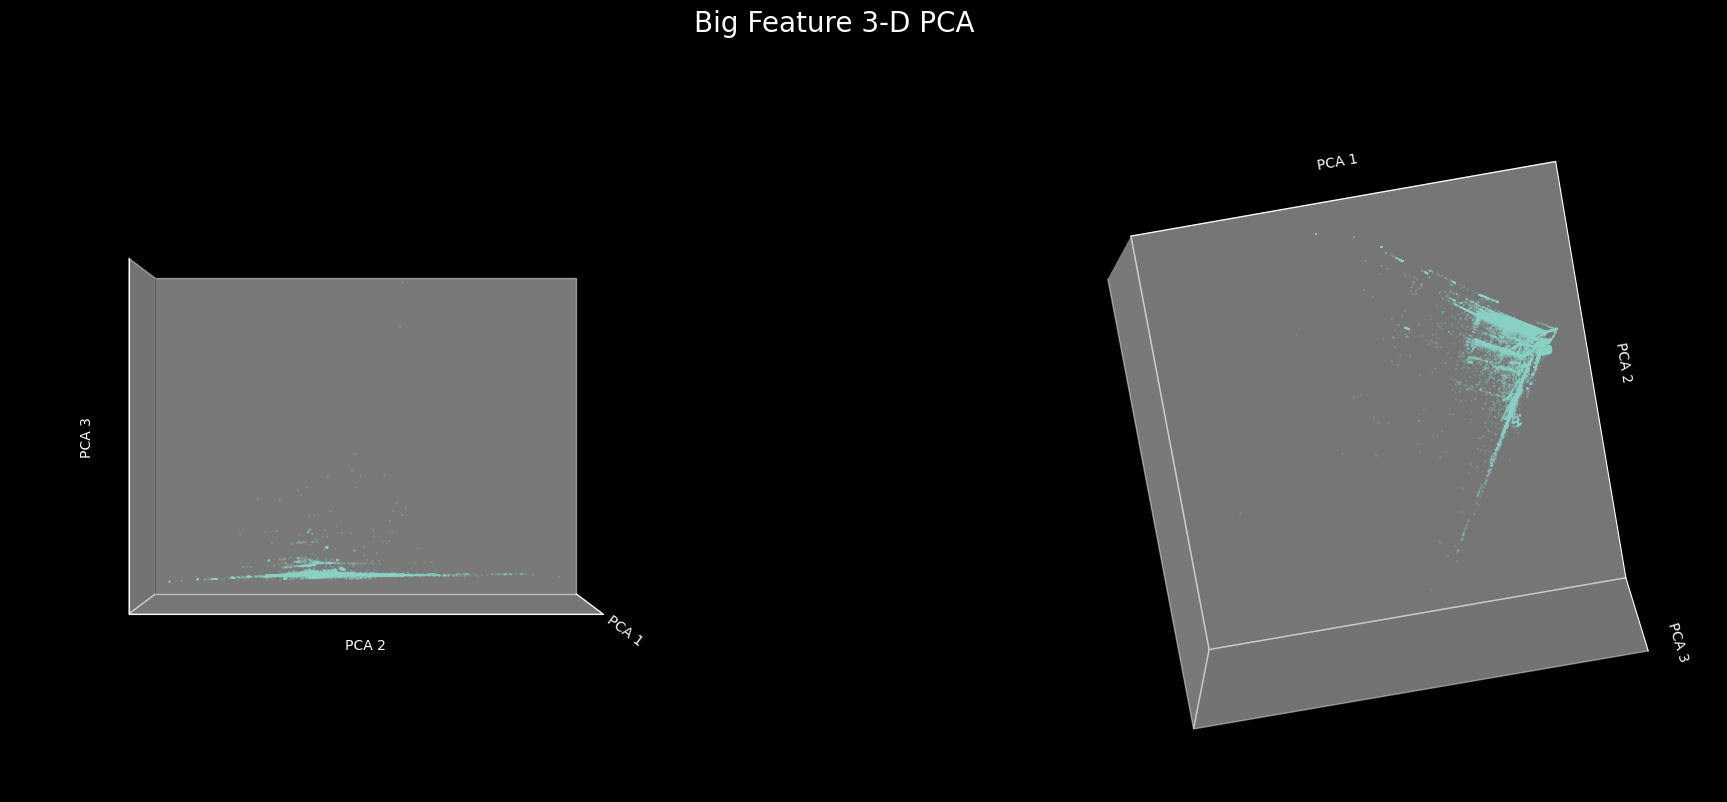

In [7]:

# Create the PCA object since the data has already been scaled
pca = PCA(n_components = 3)
# fit the data
pca_vectors = pca.fit_transform(x_data)

fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw=dict(projection='3d'), figsize = (24,9))
for i in range(2):
    ax[i].scatter(xs=pca_vectors[:,0], ys=pca_vectors[:,1], zs=pca_vectors[:,2], 
                       s=.1, cmap='rainbow', alpha=.4) 
    ax[i].set_xlabel('PCA 1', labelpad = .1)
    ax[i].set_ylabel('PCA 2', labelpad = .1)
    ax[i].set_zlabel('PCA 3', labelpad = .1)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_zticks([])


ax[0].view_init(elev=0, azim=0)
ax[1].view_init(elev=100, azim=80)

legend_labels = [i for i in range(1,9)]


plt.suptitle('Big Feature 3-D PCA', fontsize = 20)

plt.show()

From these graphs, it is pretty clear that there isn't a clear cluster structure in this dataset. It is possible that for a high value of K there are very clear clusters but I do not have the computing power nor the time to find them. The clusters from the smaller dataset provide plenty of insight and we can add them as a feature to the large dataset when we start modelling the data to predict outcomes.